<a href="https://colab.research.google.com/github/pritkudale/Code_for_LinkedIn/blob/main/K_fold_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

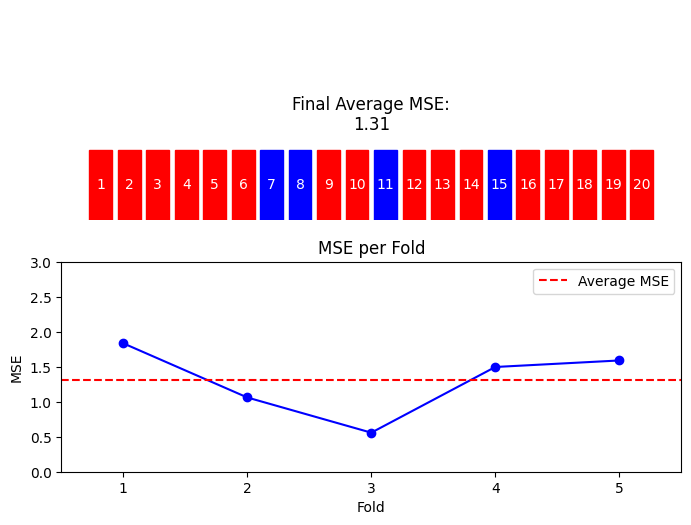

MSE scores for each fold: [1.8343077000228547, 1.0607228823225294, 0.557715512290089, 1.4962345604769667, 1.58933419325502]
Final average MSE: 1.3076629696734918


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X = np.arange(1, 21).reshape(-1, 1)
y = 2 * X.flatten() + np.random.normal(0, 1, size=20)

# K-fold cross-validation setup
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Figure setup
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
bar_width = 0.8
bars = ax1.bar(range(1, len(X) + 1), np.ones_like(X.flatten()), color="red", edgecolor="black", width=bar_width)
ax1.set_ylim(0, 3)
ax1.axis("off")

# Text and number labels, centered
info_text = ax1.text(10.5, 1.5, "", fontsize=12, ha="center", va="center") # Centered position
score_texts = []
number_texts = []
for i, bar in enumerate(bars):
    number_text = ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, str(i + 1),
                           ha="center", va="center", fontsize=10, color="white")
    number_texts.append(number_text)

# Line plot setup
x_mse = np.arange(1, n_splits + 1)
line, = ax2.plot([], [], marker='o', linestyle='-', color='blue')
ax2.set_xlim(0.5, n_splits + 0.5)
ax2.set_ylim(0, 3)
ax2.set_xlabel("Fold")
ax2.set_ylabel("MSE")
ax2.set_title("MSE per Fold")

# Average MSE line
avg_mse_line, = ax2.plot([], [], linestyle='--', color='red', label='Average MSE')

# Initialize score list
scores = []

# Animation update function
def update(frame):
    for score_text in score_texts:
        score_text.set_visible(False)

    if frame < len(frames):
        for bar in bars:
            bar.set_color("red")
        test_indices = frames[frame]["test"]
        train_indices = frames[frame]["train"]
        for i in test_indices:
            bars[i].set_color("blue")

        model = LinearRegression()
        model.fit(X[train_indices], y[train_indices])
        y_pred = model.predict(X[test_indices])
        mse = mean_squared_error(y[test_indices], y_pred)

        if len(scores) <= frame:
            scores.append(mse)

        # Center the text
        info_text.set_text(f"Fold {frames[frame]['fold']}\nTest: {test_indices + 1}\nMSE: {mse:.2f}")

        y_offset = -0.3
        for idx, score in enumerate(scores):
            score_text = ax1.text(idx + 1, y_offset, f"{score:.2f}", fontsize=8, ha="center", color="black")
            score_texts.append(score_text)

        line.set_data(x_mse[:len(scores)], scores)  # Update line plot

    else:  # Final frame
        # Display average MSE with a horizontal line
        avg_mse = np.mean(scores)
        info_text.set_text(f"Final Average MSE:\n{avg_mse:.2f}") # Centered text

        line.set_data(x_mse, scores + [0]*(len(x_mse) - len(scores)))
        avg_mse_line.set_data(ax2.get_xlim(), [avg_mse, avg_mse])  # Draw the horizontal line

# Animation setup
frames = []
fold = 1
for train_idx, test_idx in kf.split(X):
    frames.append({"fold": fold, "train": train_idx, "test": test_idx})
    fold += 1

ani = FuncAnimation(fig, update, frames=range(len(frames) + 1), repeat=False)
ax2.legend()

# Save animation
ani.save("kfold_cv.gif", writer="pillow", fps=1)

plt.show()
print("MSE scores for each fold:", scores)
print("Final average MSE:", np.mean(scores))